# plot-hrf

(Last updated: 2022-02-05)

Modified from [**Nilearn**](https://nilearn.github.io): Statistics for NeuroImaging in Python.<br> 9.5.1 _Example of hemodynamic response functions_<br>
https://nilearn.github.io/auto_examples/04_glm_first_level/plot_hrf.html#sphx-glr-download-auto-examples-04-glm-first-level-plot-hrf-py

See also: http://nipy.org/nipy/api/generated/nipy.modalities.fmri.hrf.html

Can be run from [SageMath](https://www.sagemath.org) (Kernel: `SageMath 9.4`)  if `nilearn` is installed, i.e.

> sage --pip install nilearn

In [1]:
%matplotlib inline

# Example of hemodynamic response functions.

Within this example we are going to plot the hemodynamic response function
(hrf) model in SPM together with the hrf shape proposed by G.Glover, as well as
their time and dispersion derivatives.

- Glover, Gary H. Deconvolution of impulse response in event-related BOLD fMRI. Neuroimage 1999;9(4):416-429 [[link](https://pubmed.ncbi.nlm.nih.gov/10191170)] [[pdf](https://web.mit.edu/swg/ImagingPubs/experimental-design/Glover.NeuroImage.1999.pdf)]


This example requires matplotlib.

The hrf is the filter that couples neural responses to the metabolic-related
changes in the MRI signal.  hrf models are simply phenomenological.

In current analysis frameworks, the choice of hrf model is essentially left to
the user. Fortunately, using the spm or Glover model does not make a huge
difference.  Adding derivatives should be considered whenever timing
information has some degree of uncertainty. It is actually useful to detect
timing issues.


## Set up some parameters for model display

To get an impulse response, we simulate a single event occurring at time t=0,
with duration 1s.



In [2]:
import numpy as np
frame_times = np.linspace(0, 30, 61)
onset, amplitude, duration = 0., 1., 1.
exp_condition = np.array((onset, duration, amplitude)).reshape(3, 1)

We sample this on a fris for display



In [3]:
stim = np.zeros_like(frame_times)
stim[(frame_times > onset) * (frame_times <= onset + duration)] = amplitude

Now we have to define the candidate hrf models.



In [4]:
hrf_models = [None, 'glover + derivative', 'glover + derivative + dispersion']

## Sample the hrf



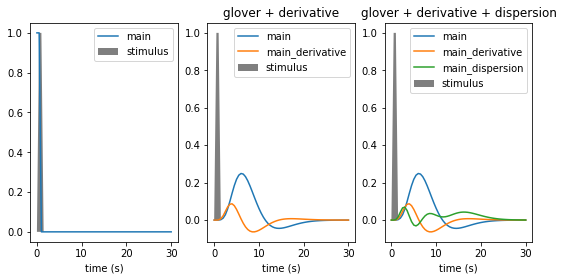

In [5]:
from nilearn.glm.first_level import compute_regressor
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 4))
for i, hrf_model in enumerate(hrf_models):
    # obtain the signal of interest by convolution
    signal, name = compute_regressor(
        exp_condition, hrf_model, frame_times, con_id='main',
        oversampling=16)

    # plot this
    plt.subplot(1, 3, i + 1)
    plt.fill(frame_times, stim, 'k', alpha=.5, label='stimulus')
    for j in range(signal.shape[1]):
        plt.plot(frame_times, signal.T[j], label=name[j])
    plt.xlabel('time (s)')
    plt.legend(loc=1)
    plt.title(hrf_model)

# adjust the plot
plt.subplots_adjust(bottom=.12)
plt.show()

### Papers of relevance

<img src="assets/rs-hrf.png" alt="drawing" width="400"/>

**Resting State Hemodynamic Response Function Retrieval and Deconvolution (RS-HRF) Images** (https://www.nitrc.org/projects/rshrf)

Wu, Guo-Rong; Colenbier, Nigel; Van Den Bossche, Sofie; Clauw, Kenzo, et al. rsHRF: A toolbox for resting-state HRF estimation and deconvolution. Neoroimage 2021;244:11859 [[link](https://www.sciencedirect.com/science/article/pii/S1053811921008648)]  [[pdf](https://www.sciencedirect.com/science/article/pii/S1053811921008648/pdfft?isDTMRedir=true&download=true)]
[[code](https://www.nitrc.org/projects/rshrf)]
> The hemodynamic response function (HRF) greatly influences the intra- and inter-subject variability of brain activation and connectivity, and might confound the estimation of temporal precedence in connectivity analyses, making its estimation necessary for a correct interpretation of neuroimaging studies. Additionally, the HRF shape itself is a useful local measure. However, most algorithms for HRF estimation are specific for task-related fMRI data, and only a few can be directly applied to resting-state protocols. Here we introduce rsHRF, a Matlab and Python toolbox that implements HRF estimation and deconvolution from the resting-state BOLD signal.
>
> This toolbox is aimed to retrieve the onsets of pseudo-events triggering an hemodynamic response from resting state fMRI BOLD signal. It is based on point process theory, and fits a model to retrieve the optimal lag between the events and the HRF onset, as well as the HRF shape, using different shape parameters or combinations of basis functions.
>
Once that the HRF has been retrieved for each voxel/vertex, it can be deconvolved from the time series (for example to improve lag-based connectivity estimates), or one can map the shape parameters everywhere in the brain (including white matter), and use it as a pathophysiological indicator.
>
Input can be 2D GIfTI, 3D or 4D NIfTI images, but also on time series matrices/vectors.
The output are three HRF shape parameters for each voxel/vertex, plus the deconvolved time series, and the number of retrieved pseudo-events. All can be written back to GIfTI or NIfTI images.


- Wenjing Yan, D Rangaprakash, Gopikrishna Deshpande. Estimated hemodynamic response function parameters obtained from resting state BOLD fMRI signals in subjects with autism spectrum disorder and matched healthy subjects. Data Brief 2018;19:1305-1309.
> Most of the time the HRF is associated with task-based fMRI protocols, in which its onset is explicitly included in the design matrix. On the other hand, the HRF also mediates the relationship between spontaneous neural activity and the BOLD signal in resting-state protocols, in which no explicit stimulus is taken into account. It has been shown that resting-state brain dynamics can be characterized by looking at sparse BOLD events, which can be retrieved by point process analysis. These events can be then used to retrieve the HRF at rest.

- J.M. Levin, M.H. Ross, J.H. Mendelson, M.J. Kaufman, N. Lange, L.C. Maas, N.K. Mello, B.M. Cohen, P.F. Renshaw. Reduction in BOLD fMRI response to primary visual stimulation following alcohol ingestion. Psychiatry Res 1998;82(3):135-146


- G. Deshpande, K. Sathian, X. Hu. Effect of hemodynamic variability on Granger causality analysis of fMRI Neuroimage 2010;52(3):884-896.


- M.D. Noseworthy, J. Alfonsi, S. Bells. Attenuation of brain BOLD response following lipid ingestion. Hum Brain Mapp 2003;20:116-121. [[link](https://onlinelibrary.wiley.com/doi/epdf/10.1002/hbm.10131)]
> We sought to assess whether controllable physiologic modulators, such as dietary factors, could influence the outcome of fMRI data. A high fat diet, for example, prior to a fMRI scan could change microvascular blood rheologic factors and potentially alter brain blood oxygen-level dependent (BOLD) signal patterns. 


- E. Amico, F. Gomez, C. Di Perri, A. Vanhaudenhuyse, D. Lesenfants, P. Boveroux, V. Bonhomme, J.F. Brichant, D. Marinazzo, S. Laureys. Posterior cingulate cortex-related co-activation patterns: a resting state fMRI study in propofol-induced loss of consciousness. PLoS One 2014;9(6)  [[link](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0100012)]
> Lately, point process analysis applied on functional data has revealed that much of the information regarding brain connectivity is contained in a fraction of critical time points of a resting state dataset. In the present study we want to extend this methodology for the investigation of resting state fMRI spatial pattern changes during propofol-induced modulation of consciousness, with the aim of extracting new insights on brain networks consciousness-dependent fluctuations.

